# Understanding Crystal class

This tutorial will guide you through using the `Crystal` class to simulate and analyze nonlinear optical processes, specifically second harmonic generation (SHG) and spontaneous parametric down-conversion (SPDC). We'll cover initializing the crystal for different processes, exploring medium properties, and understanding different configuration options.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ParaTune.media.Crystal import Crystal
from ParaTune.media.SPDCCrystal import SPDCCrystal
from ParaTune.media.SHGCrystal import SHGCrystal

## 1. Nonlinear Process Initialization
There are two options for the nonlinear interaction : **Spontaneous parametric down conversion** (SPDC) or **Second harmonic generatio** (SHG).

Defining the interaction parameter as either SHG or SPDC is crucial for specifying the nonlinear interaction, ensuring the correct phase matching function is used to describe momentum conservation and optimize process efficiency.

### SHG Process

For the SHG process, we initialize a crystal with specific parameters for the fundamental and second harmonic fields.

In [9]:
# General crystal parameters for SHG
config = 'normal'
medium = 'KTP'
length = 5e-3  # Crystal length in meters
nz = 20000  # Number of grid points along z
fundamental = 'y'  # Polarization of fundamental wave
second_harmonic = 'x'  # Polarization of second harmonic wave

# Initialize the crystal for SHG
crystal_shg = SHGCrystal(config, medium, nz,
                      1064e-9,  # Central wavelength for SHG process
                      fundamental,
                      second_harmonic, length=length)

# Compute the nonlinear profile for SHG
parameters_shg = np.array(crystal_shg.poling_function(np.array(crystal_shg.domain_values)), dtype=np.float32)[:len(crystal_shg.z_grid)]


domain_width/2 = 4.289870958018582e-06 
dictretization step along z = 2.5e-07


### SPDC Process

For the SPDC process, the crystal is initialized with parameters corresponding to the signal, idler, and pump fields.

In [10]:
# General crystal parameters for SPDC
medium = 'LiNbO3'
signal = 'x'  # Polarization of the signal wave
idler = 'y'  # Polarization of the idler wave
pump = 'y'  # Polarization of the pump wave

# Initialize the crystal for SPDC
crystal_spdc = SPDCCrystal(config, medium, nz, 1064e-9,
                       signal, idler, pump, length=length)

# Compute the nonlinear profile for SPDC
parameters_spdc = np.array(crystal_spdc.poling_function(np.array(crystal_spdc.domain_values)), dtype=np.float32)[:len(crystal_spdc.z_grid)]


domain_width/2 = 0.0001684138987911865 
dictretization step along z = 2.5e-07


### Plotting The Phase Mismatch

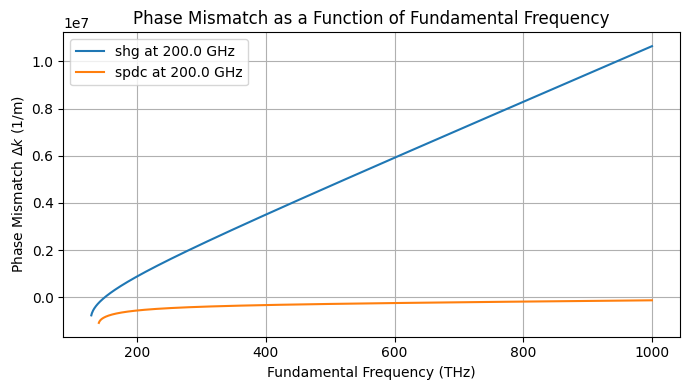

In [11]:
# Frequency range for the fundamental wave
omega1 =  np.linspace(1e14, 10e14, 1000) # Fundamental frequency range (Hz) 
omega2 = 2e14  # Second harmonic frequency range (Hz)
phase_mismatch_shg = crystal_shg.wavevector_mismatch()
phase_mismatch_spdc = crystal_spdc.wavevector_mismatch()

# Plotting
plt.figure(figsize=(7, 4))
plt.plot(omega1*1e-12, phase_mismatch_shg(omega1, omega1, omega2), label=f"shg at {omega2*1e-12} GHz")
plt.plot(omega1*1e-12, phase_mismatch_spdc(omega1, omega2), label=f"spdc at {omega2*1e-12} GHz")
plt.title('Phase Mismatch as a Function of Fundamental Frequency')
plt.xlabel('Fundamental Frequency (THz)')
plt.ylabel('Phase Mismatch $\Delta k$ (1/m)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Plotting the phase matching function
The Crystal class allow to compute the phase matching function (PMF) of the nonlinear optical crystal, crucial for understanding the efficiency of nonlinear optical processes like second harmonic generation or parametric down-conversion. It evaluates how well the phases of interacting optical waves are matched across the crystal, which directly impacts the efficiency of these processes.

Here's an example of how you might use this function and plot the resulting PMF:

domain_width/2 = 1.6299132767017e-05 
dictretization step along z = 3e-06
domain_width/2 = 1.6299132767017e-05 
dictretization step along z = 3e-06
domain_width/2 = 1.6299132767017e-05 
dictretization step along z = 3e-06
domain_width/2 = 1.6299132767017e-05 
dictretization step along z = 3e-06


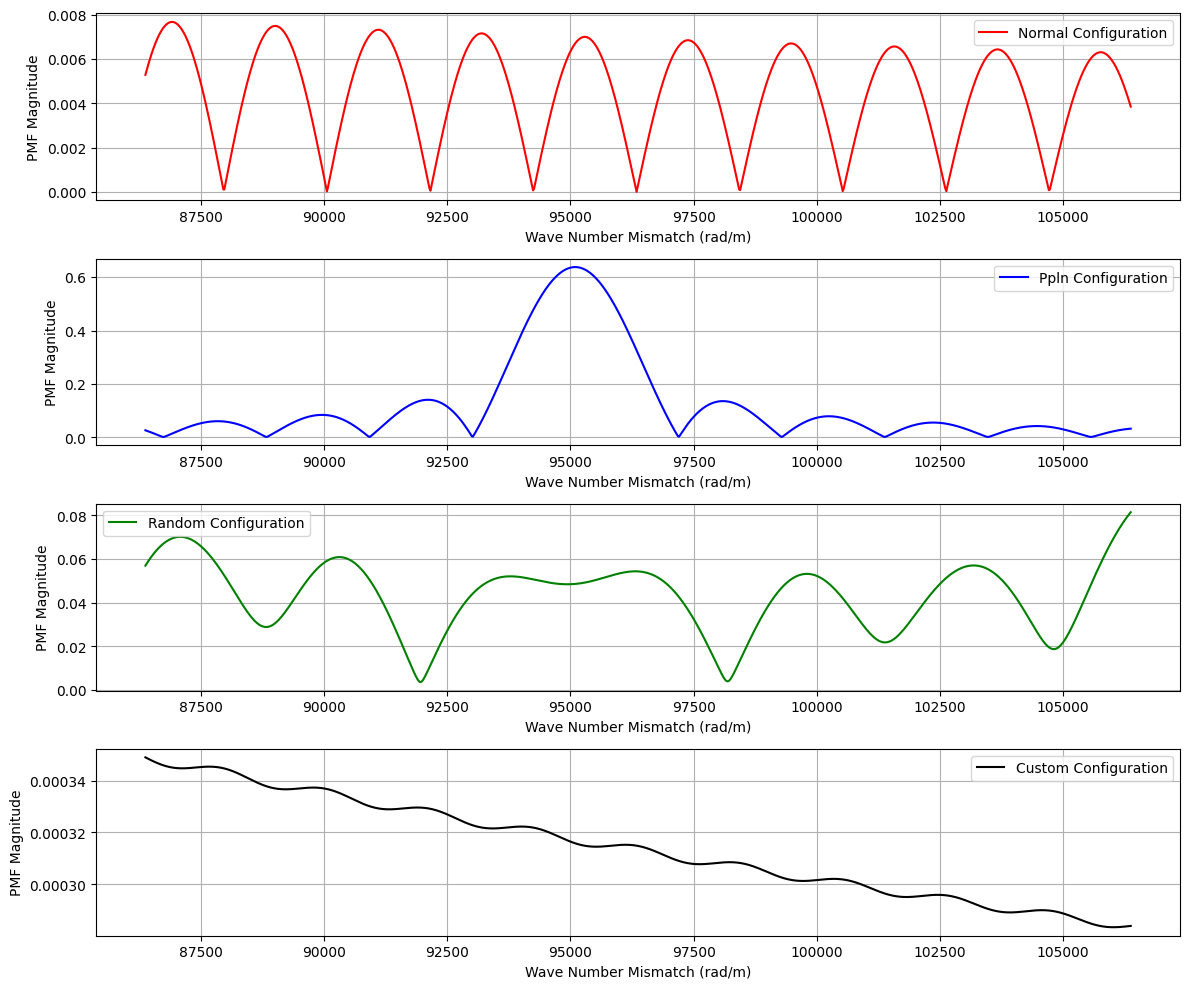

In [12]:
wave_number_span = 20000  # Example span of wave numbers to evaluate around the central mismatch
wave_number_grid_points = 1000  # Number of points to discretize the wave number span

configurations = ['normal', 'ppln', 'random', 'custom']
colors = ['r', 'b', 'g', 'k']
length = 3e-3  # Crystal length in meters for all configurations
nz = 1000

# Initialize and plot nonlinear profiles for each configuration
fig, axs = plt.subplots(4, 1, figsize=(12, 10))

for i, config in enumerate(configurations):
    if config == 'custom':
        # Custom domain values and bounds for demonstration
        domain_values = np.linspace(0, length/np.max(length), nz)  # Example domain values
        domain_bounds = (0, length)  # Example domain bounds
        crystal = SPDCCrystal(config, 'KTP', nz, 1064e-9, 'z', 'y', 'y', length=length, domain_values_custom=domain_values, domain_bounds_custom=domain_bounds)
    else:
        crystal = SPDCCrystal(config, 'KTP', nz, 1064e-9, 'z', 'y', 'y', length=length)

    wave_number_array, pmf = crystal.phase_matching_function(wave_number_span, wave_number_grid_points)
    axs[i].plot(wave_number_array, np.abs(pmf), color=colors[i], label=f'{config.capitalize()} Configuration')
    axs[i].set_xlabel('Wave Number Mismatch (rad/m)')
    axs[i].set_ylabel('PMF Magnitude')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

## 2. Medium Characteristics
There are two options for the medium : **Lithium niobate** (LiNbO3) or **Titanyl phosphate de potassium** (KTP).

Lithium niobate and KTP are two optical media, each characterized by specific Sellmeier equations for different polarizations and nonlinear coefficients for phase matching, derived from scientific literature.

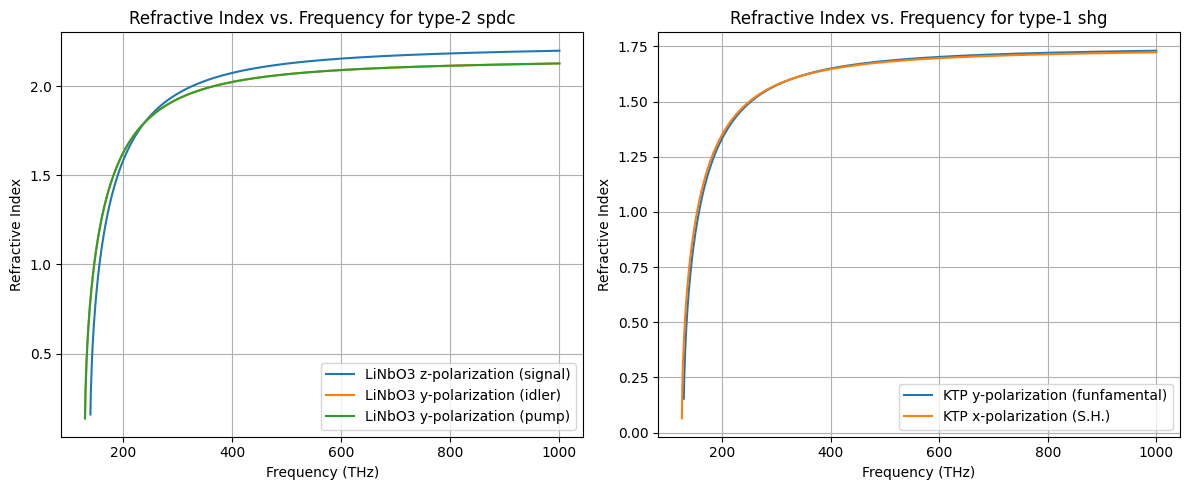

In [13]:
# Prepare the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Wavelength domain representation
axs[0].plot(omega1*1e-12, crystal_spdc.n_s(omega1), label='LiNbO3 z-polarization (signal)')
axs[0].plot(omega1*1e-12, crystal_spdc.n_i(omega1), label='LiNbO3 y-polarization (idler)')
axs[0].plot(omega1*1e-12, crystal_spdc.n_p(omega1), label='LiNbO3 y-polarization (pump)')
axs[0].set_xlabel('Frequency (THz)')
axs[0].set_ylabel('Refractive Index')
axs[0].set_title('Refractive Index vs. Frequency for type-2 spdc')
axs[0].grid(True)
axs[0].legend()

# Frequency domain representation
axs[1].plot(omega1*1e-12, crystal_shg.n_f(omega1), label='KTP y-polarization (funfamental)')
axs[1].plot(omega1*1e-12, crystal_shg.n_sh(omega1), label='KTP x-polarization (S.H.)')
axs[1].set_xlabel('Frequency (THz)')
axs[1].set_ylabel('Refractive Index')
axs[1].set_title('Refractive Index vs. Frequency for type-1 shg')
axs[1].grid(True)
axs[1].legend()


plt.tight_layout()
plt.show()

## 3. Crystal Configuration Examples
The crystal configuration offers four choices: 
- **normal** for a standard bulk crystal
- **ppln** which auto-calculates domain width for phase matching unless specified
- **random** for a randomly generated nonlinear profile
- **custom** for a user-defined profile with specific domain values and boundaries. 

Additionally, crystal length can be directly set or randomly determined within given maximum and minimum bounds.

domain_width/2 = 1.6299132767017e-05 
dictretization step along z = 2.9999999999999997e-05
Discretization step along z could be too big. Increase the number of grid points along z such that it is at least twice the width of domain
domain_width/2 = 1.6299132767017e-05 
dictretization step along z = 2.9999999999999997e-05
Discretization step along z could be too big. Increase the number of grid points along z such that it is at least twice the width of domain
domain_width/2 = 1.6299132767017e-05 
dictretization step along z = 2.9999999999999997e-05
Discretization step along z could be too big. Increase the number of grid points along z such that it is at least twice the width of domain
domain_width/2 = 1.6299132767017e-05 
dictretization step along z = 2.9999999999999997e-05
Discretization step along z could be too big. Increase the number of grid points along z such that it is at least twice the width of domain


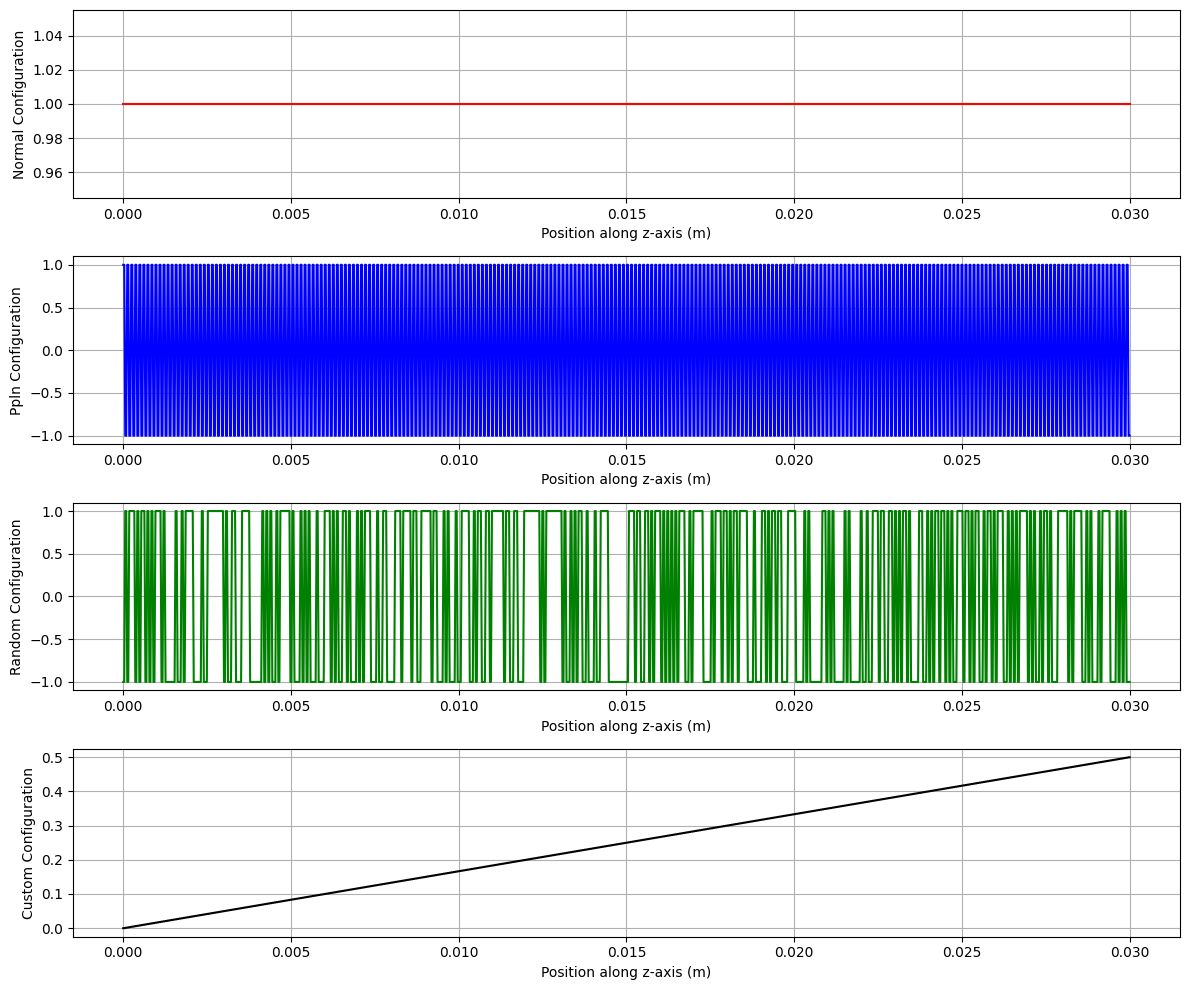

In [14]:
# Example configurations for SPDC process in a KTP crystal
configurations = ['normal', 'ppln', 'random', 'custom']
colors = ['r', 'b', 'g', 'k']
length = 30e-3  # Crystal length in meters for all configurations
nz = 1000

# Initialize and plot nonlinear profiles for each configuration
fig, axs = plt.subplots(4, 1, figsize=(12, 10))

for i, config in enumerate(configurations):
    if config == 'custom':
        # Custom domain values and bounds for demonstration
        domain_values = np.linspace(0, length/np.max(length), nz)  # Example domain values
        domain_bounds = (0, length)  # Example domain bounds
        crystal = SPDCCrystal(config, 'KTP', nz, 1064e-9, 'z', 'y', 'y', length=length, domain_values_custom=domain_values, domain_bounds_custom=domain_bounds)
    else:
        crystal = SPDCCrystal(config, 'KTP', nz, 1064e-9, 'z', 'y', 'y', length=length)

    parameters = np.array(crystal.poling_function(np.array(crystal.domain_values)), dtype=np.float32)[:len(crystal.z_grid)]
    axs[i].plot(np.linspace(0, length, nz), parameters, color=colors[i])
    axs[i].set_xlabel('Position along z-axis (m)')
    axs[i].set_ylabel(f'{config.capitalize()} Configuration')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

## 4. Fourier Series Coefficients and Poling Expansion
The `fourier_series_coeff_numpy` and `poling_expansion` functions are typically used to analyze and design the poling pattern of nonlinear crystals. `fourier_series_coeff_numpy` computes the Fourier series coefficients of a given nonlinear profile, which helps in understanding the frequency components of the poling pattern. `poling_expansion`, on the other hand, utilizes these coefficients to reconstruct or approximate the nonlinear profile, enabling the design of custom poling patterns for specific phase-matching conditions.

domain_width/2 = 0.0005 
dictretization step along z = 1.25e-06


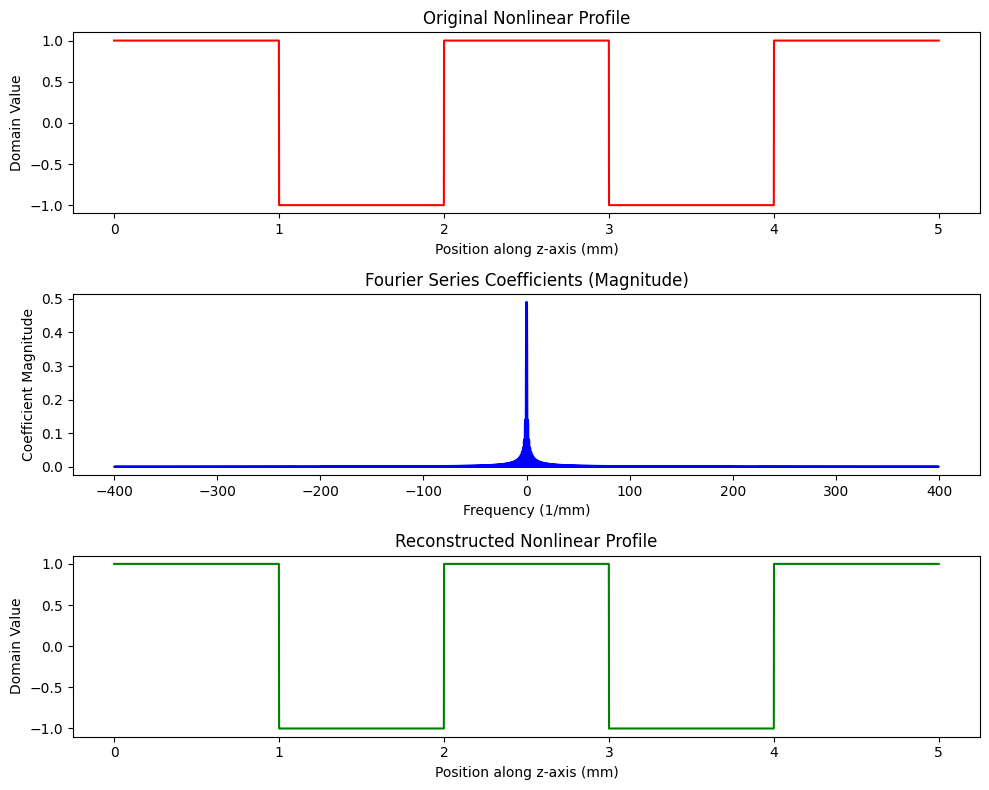

In [15]:
# General crystal parameters for SPDC
config = 'ppln'
medium = 'KTP'
length = 5e-3  # Crystal length in meters
nz = 4000  # Number of grid points along z
domain_width = 1e-3
signal = 'x'  # Polarization of the signal wave
idler = 'y'  # Polarization of the idler wave
pump = 'y'  # Polarization of the pump wave

# Initialize the crystal for SPDC
crystal_spdc = SPDCCrystal(config, medium, nz, 1064e-9,
                       signal, idler, pump, length=length, domain_width=domain_width)

# Calculate Fourier series coefficients
n = len(crystal_spdc.z_grid)
parameters_spdc = np.array(crystal_spdc.poling_function(np.array(crystal_spdc.domain_values)), dtype=np.float32)[:len(crystal_spdc.z_grid)]
coefficients = crystal_spdc.fourier_series_coeff_numpy(parameters_spdc)
freq = np.fft.fftfreq(n, d=crystal_spdc.discretization_step_z*1e3)

# Use coefficients to reconstruct or approximate the nonlinear profile
reconstructed_profile = crystal_spdc.poling_expansion(coefficients)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Original domain values
ax[0].plot(crystal_spdc.z_grid*1e3, parameters_spdc, color='r')
ax[0].set_title('Original Nonlinear Profile')
ax[0].set_ylabel('Domain Value')
ax[0].set_xlabel('Position along z-axis (mm)')

# Fourier series coefficients (magnitude)
coeff_magnitudes = np.abs(coefficients)
ax[1].plot(freq, coeff_magnitudes, color='b')
ax[1].set_title('Fourier Series Coefficients (Magnitude)')
ax[1].set_ylabel('Coefficient Magnitude')
ax[1].set_xlabel('Frequency (1/mm)')

# Fourier series coefficients (magnitude)
coeff_magnitudes = np.abs(coefficients)
ax[2].plot(crystal_spdc.z_grid*1e3, reconstructed_profile, color='g')
ax[2].set_title('Reconstructed Nonlinear Profile')
ax[2].set_ylabel('Domain Value')
ax[2].set_xlabel('Position along z-axis (mm)')

plt.tight_layout()
plt.show()

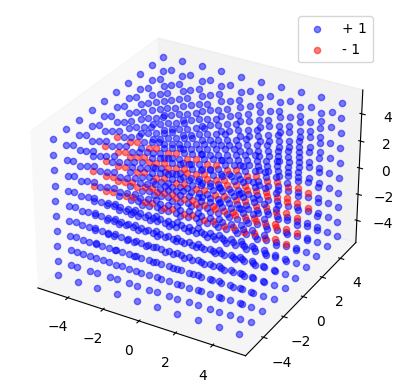

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def random_value_function(x, y, z, domain_width):
    # Function that returns a random +1 or -1 for any given (x, y, z)
    return np.random.choice([-1, 1])

def ppln_value_function(self,x, y, z, domain_width):
    # Determine the segment of the domain based on z and domain_width
    segment = np.floor(z / domain_width)
    
    # Alternate the value based on the segment's parity
    value = -1 if segment % 2 == 0 else 1
    return value

def cylinder_value_function(x, y, z, radius):
    # Check if the point is inside the cylinder (ignoring z-coordinate)
    if z**2 + y**2 <= radius**2:
        return -1  # Point is inside the cylinder
    else:
        return +1  # Point is outside the cylinder

# Create a meshgrid for x, y, z in the range of -5 to 5
domain_width = 2
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(-5, 5, 10)
x, y, z = np.meshgrid(x, y, z)

# Evaluate the function on the meshgrid
values = np.vectorize(cylinder_value_function)(x, y, z, domain_width)

def plot_meshgrid_values(x, y, z, values):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.grid(False)  # Turn off the grid
    #ax.axis('off')  # Turn off the axis

    # Flatten arrays for plotting
    x, y, z, values = x.flatten(), y.flatten(), z.flatten(), values.flatten()

    # Plot points, color by value, with transparency
    for i in range(len(values)):
        color = 'blue' if values[i] == 1 else 'red'
        ax.scatter(x[i], y[i], z[i], c=color, marker='o', alpha=0.5)  # Semi-transparent markers
    # Add legend with custom labels
    ax.scatter([], [], [], c='blue', marker='o', alpha=0.5, label=r'+ 1')
    ax.scatter([], [], [], c='red', marker='o', alpha=0.5, label=r'- 1')
    ax.legend()

    plt.show()

plot_meshgrid_values(x, y, z, values)


In [20]:
np.ones((1,3)) * np.array([2])

array([[2., 2., 2.]])